### Preparation

Import the packedges we need.

In [10]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### 1. Load the dataset seeds.csv.

In [11]:

# Load the dataset
seeds_df = pd.read_csv('seeds.csv')

# Display the first few rows of the dataframe
seeds_df.head()


,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama wheat


### 2. Extract the grain variety and the feature data, and transform the feature data into a numpy array.

In [12]:
# Extract the grain variety
variety = seeds_df.iloc[:, -1]

# Extract the feature data and transform it into a numpy array
features = seeds_df.iloc[:, :-1].to_numpy()

variety.head(), features[:5]

(0    Kama wheat
 1    Kama wheat
 2    Kama wheat
 3    Kama wheat
 4    Kama wheat
 Name: grain_variety, dtype: object,
 array([[15.26  , 14.84  ,  0.871 ,  5.763 ,  3.312 ,  2.221 ,  5.22  ],
        [14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
        [14.29  , 14.09  ,  0.905 ,  5.291 ,  3.337 ,  2.699 ,  4.825 ],
        [13.84  , 13.94  ,  0.8955,  5.324 ,  3.379 ,  2.259 ,  4.805 ],
        [16.14  , 14.99  ,  0.9034,  5.658 ,  3.562 ,  1.355 ,  5.175 ]]))

### 3. Run the non-negative matrix decomposition on the data multiple times (rank=3, repeat_times=20).

In [13]:
# Parameters
rank = 3
repeat_times = 20
max_iter = 1000  # Increased maximum iteration

# Initialize lists to store results
nmf_models = []
silhouette_scores = []

# Run NMF
for _ in range(repeat_times):
    # Apply NMF
    nmf = NMF(n_components=rank, init='random', max_iter=max_iter, random_state=None)
    W = nmf.fit_transform(features)

    # Store decomposition results
    nmf_models.append(W)

    # Run KMeans clustering on W and calculate silhouette score
    kmeans = KMeans(n_clusters=rank, n_init=20, random_state=None).fit(W)
    labels = kmeans.labels_
    score = silhouette_score(features, labels)
    silhouette_scores.append(score)

# Showing the results of partial NMF decomposition
nmf_models[0][:5]

array([[2.70390134, 0.88957393, 0.4564148 ],
       [2.68752964, 0.37848612, 0.52421316],
       [2.49509754, 1.09145473, 0.40359983],
       [2.3901675 , 0.90769979, 0.46312236],
       [3.00380381, 0.51688019, 0.43750213]])

### 4. Calculate the Silhouette coefficients for each clustering result ,and plot a  line graph labeling the best score.

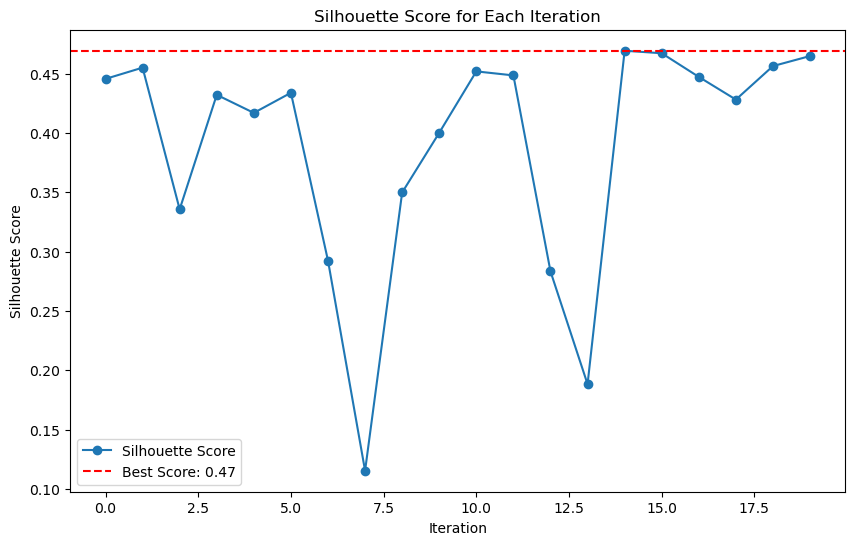

In [17]:
# Find the best score and corresponding clustering results
best_score_idx = np.argmax(silhouette_scores)
best_score = silhouette_scores[best_score_idx]
best_labels = kmeans.labels_  # Use labels from the best iteration

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(repeat_times), silhouette_scores, marker='o', label='Silhouette Score')
plt.xlabel('Iteration')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Each Iteration')
plt.axhline(y=best_score, color='r', linestyle='--', label=f'Best Score: {best_score:.2f}')
plt.legend()
plt.show()

### 5. Transform the clustering results corresponding to the best score into a Dataframe, and make a crosstab of the varieties and the best clustering results pd.crosstab(df1, df2)

In [16]:

# Transform clustering results into DataFrame
best_clustering_df = pd.DataFrame({'variety': variety.values, 'cluster': best_labels})

# Create crosstab of varieties and best clustering results
crosstab_results = pd.crosstab(best_clustering_df['variety'], best_clustering_df['cluster'])

# Display crosstab
print("\nCrosstab of Varieties and Clustering Results:")
crosstab_results



Crosstab of Varieties and Clustering Results:


cluster,0,1,2
variety,,,
Canadian wheat,68,0,2
Kama wheat,7,2,61
Rosa wheat,0,61,9
